
Task 2 @codeSoft by MD_AYYAN      

Customer Churn Predition 

Task is to predict whether this particular customer will leave bank or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler

Data Exploration

In [11]:
churn_df = pd.read_csv(r"D:\ayyan_11\CODE\Ml_codesoft\churn predictt\Churn_Modelling.csv")

In [12]:
churn_df = churn_df.copy()
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_df.shape

(10000, 14)

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
churn_df["CustomerId"].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319],
      dtype=int64)

In [14]:
# Checking for null values
null_values = churn_df.isnull().sum().sum()
print(f"Number of Null values : {null_values}")

Number of Null values : 0


Preprocessing

In [15]:
# Dropping RowNumber,CustomerID,Surname
churn_df.drop(columns=["RowNumber","CustomerId","Surname"],inplace = True)

In [16]:
churn_df.shape

(10000, 11)

In [17]:
list(churn_df.columns)

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [18]:
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
churn_df["Tenure"].value_counts().values

array([1048, 1035, 1028, 1025, 1012, 1009,  989,  984,  967,  490,  413],
      dtype=int64)

Univariate

## Disribution of Credit Scores

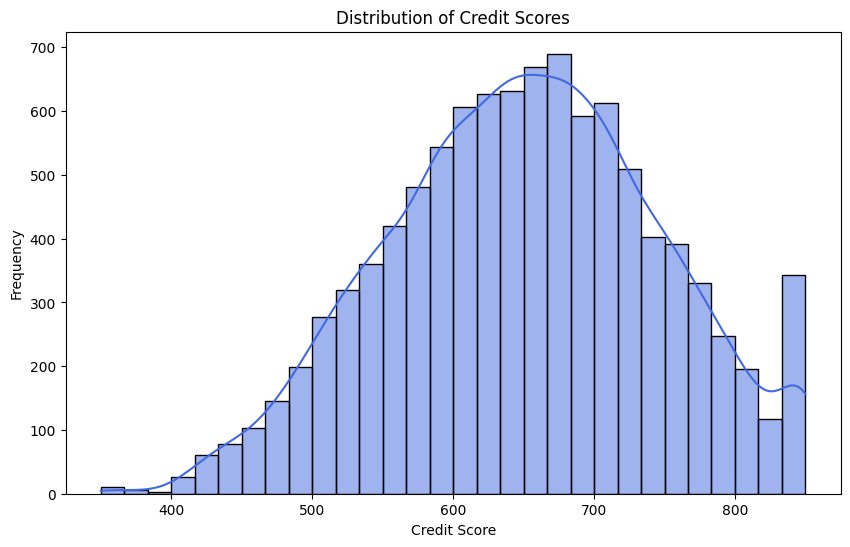

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_df['CreditScore'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

## Geographical Distribution

C:\Users\mdayy\AppData\Local\Temp\ipykernel_32108\1162949533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x='Geography', palette='Set2')


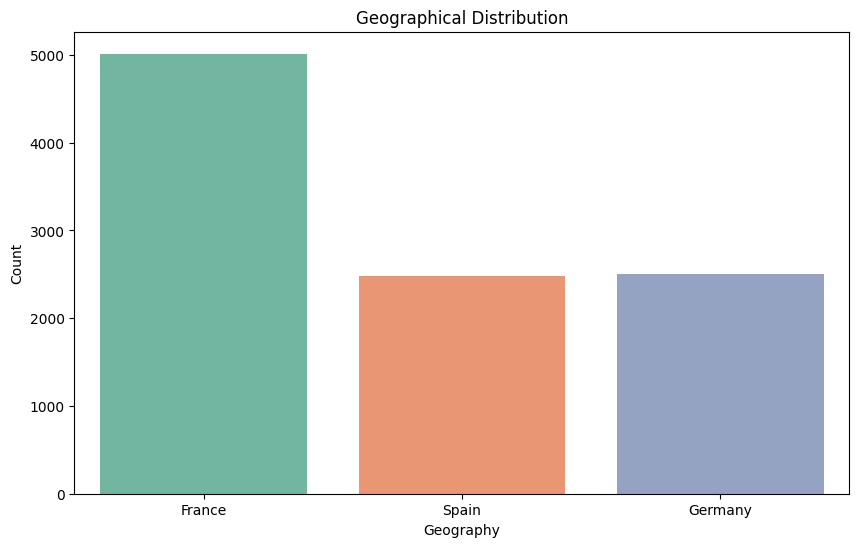

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='Geography', palette='Set2')
plt.title('Geographical Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()



## Gender Distribution

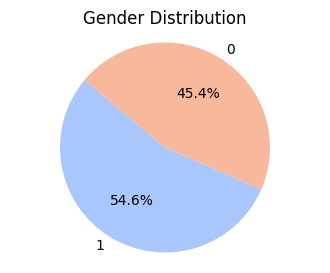

In [49]:
gender_counts = churn_df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

colors = sns.color_palette('coolwarm', len(labels))

plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Age Distribution

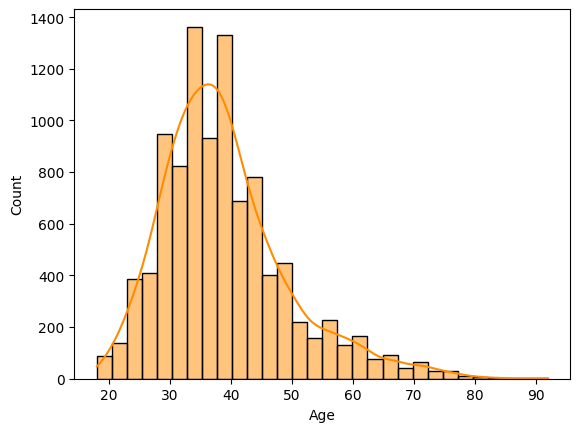

In [25]:
sns.histplot(data = churn_df,x="Age",kde = True,bins = 30,color = "darkorange")
plt.show()

## Tenure Distribution

C:\Users\mdayy\AppData\Local\Temp\ipykernel_32108\4106646508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df,x="Tenure",palette = "viridis")


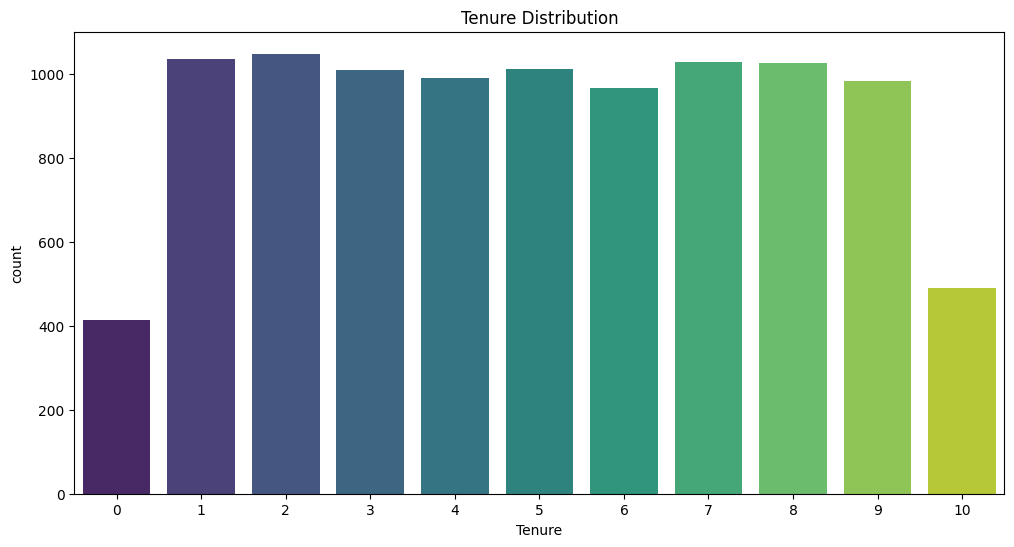

In [26]:
tenure = churn_df["Tenure"].value_counts()
plt.figure(figsize = (12,6))
sns.countplot(data=churn_df,x="Tenure",palette = "viridis")
plt.title("Tenure Distribution")
plt.show()

## Number of Products

C:\Users\mdayy\AppData\Local\Temp\ipykernel_32108\3179282809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x='NumOfProducts', palette='Set1')


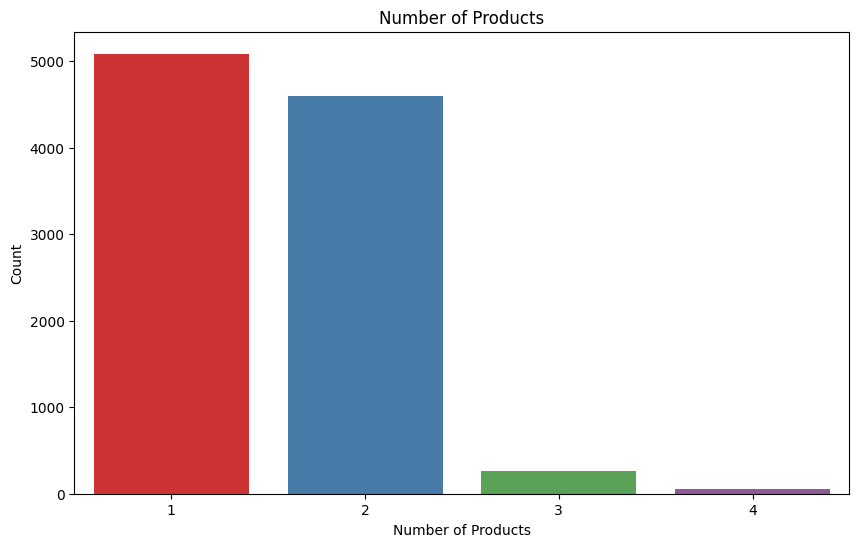

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='NumOfProducts', palette='Set1')
plt.title('Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()


## Credit Card Holders

C:\Users\mdayy\AppData\Local\Temp\ipykernel_32108\1407164474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_df, x='HasCrCard', palette='Set2')


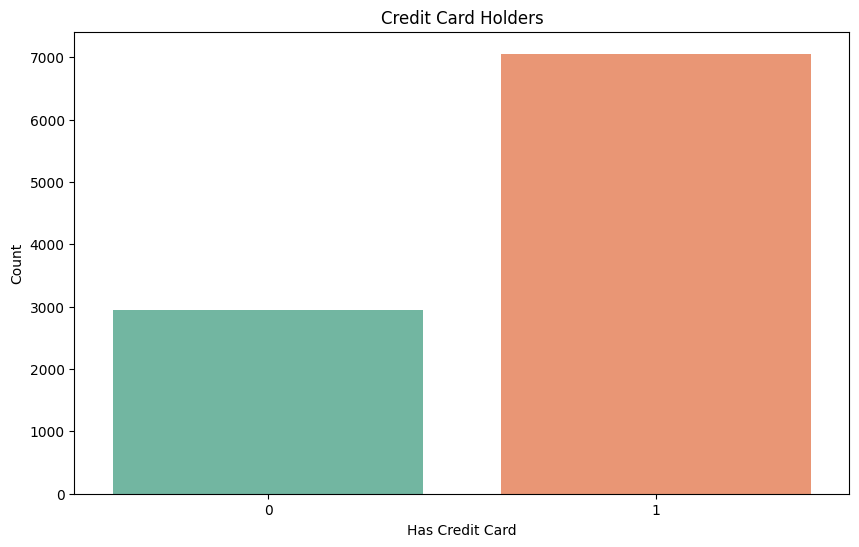

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='HasCrCard', palette='Set2')
plt.title('Credit Card Holders')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()


### Churn Distribution

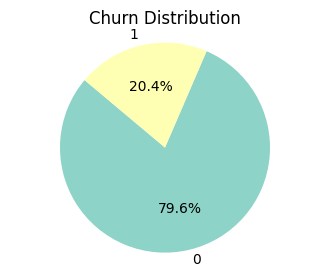

In [51]:
churn_counts = churn_df['Exited'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

colors = sns.color_palette('Set3', len(labels))

plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

Bivariate

## Exited vs Age

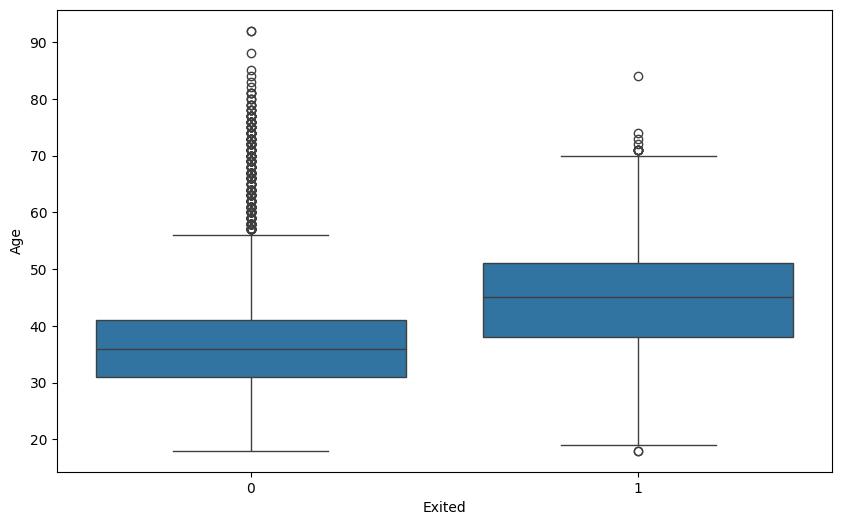

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=churn_df,x='Exited',y='Age')
plt.show()

## Credit Score vs. Estimated Salary

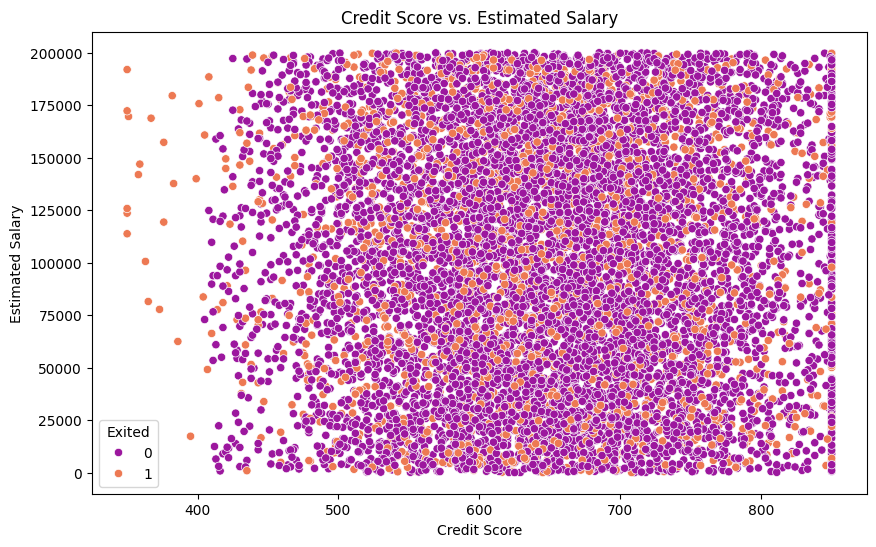

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn_df, x='CreditScore', y='EstimatedSalary', hue='Exited', palette='plasma')
plt.title('Credit Score vs. Estimated Salary')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.show()


## Age vs. Balance

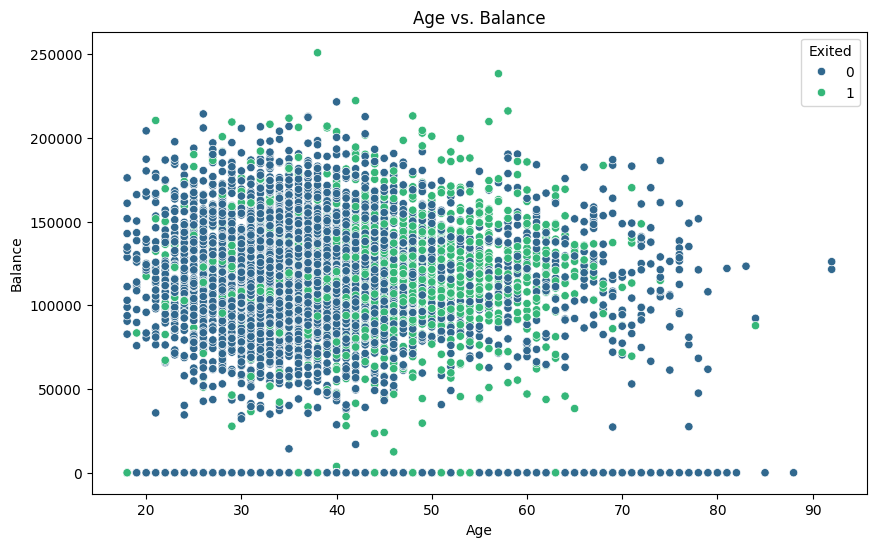

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn_df, x='Age', y='Balance', hue='Exited', palette='viridis')
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


## Heatmap

Strong Positive or Strong Negative Corelation 

When using dummy variables, you typically drop the reference category to avoid multicollinearity.
Multicollinearity occurs when two or more predictor variables are highly correlated, leading to unstable model coefficients & prevent perfect linear dependence among the dummy variables

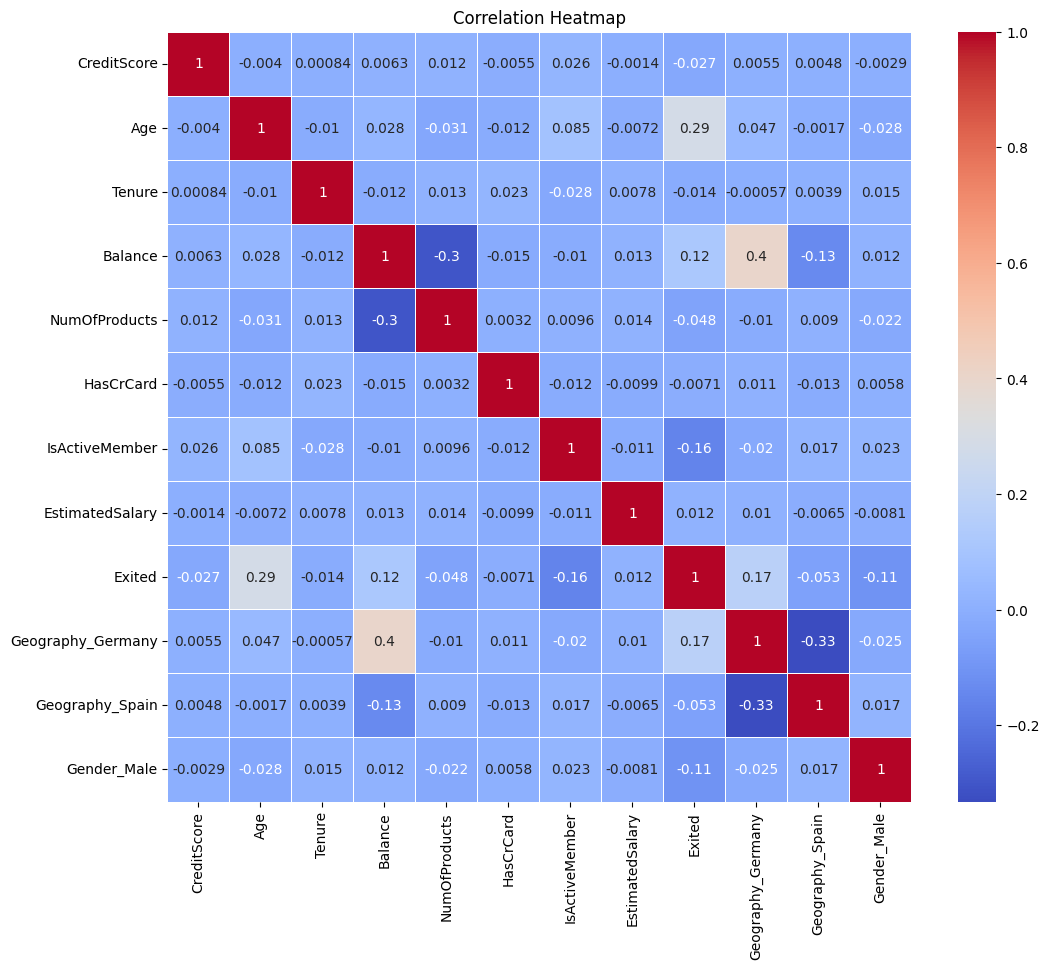

In [33]:
churn_encoded_df = pd.get_dummies(churn_df, columns=['Geography', 'Gender'], drop_first=True)

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(churn_encoded_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
churn_df = pd.get_dummies(churn_df, columns=['Geography'],dtype=int,drop_first=True)

In [35]:
input_col = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
target_col = "Exited"
input_col

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain']

In [36]:
churn_df["Gender"] = churn_df["Gender"].map({"Male": 1, "Female": 0}) 

In [37]:
churn_train_df, churn_test = train_test_split(churn_df,test_size = 0.2,random_state=42)
churn_train , churn_val = train_test_split(churn_train_df,test_size=0.25,random_state=42)
len(churn_train) , len(churn_test) , len(churn_val)

(6000, 2000, 2000)

In [38]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int32  
 11  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(2), int64(8)
memory usage: 859.5 KB


In [39]:
train_input = churn_train[input_col].copy()
train_target = churn_train[target_col].copy()
test_input = churn_test[input_col].copy()
test_target = churn_test[target_col].copy()
val_input = churn_val[input_col].copy()
val_target = churn_val[target_col].copy()

In [40]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 8588 to 6090
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   int64  
 1   Gender             6000 non-null   int64  
 2   Age                6000 non-null   int64  
 3   Tenure             6000 non-null   int64  
 4   Balance            6000 non-null   float64
 5   NumOfProducts      6000 non-null   int64  
 6   HasCrCard          6000 non-null   int64  
 7   IsActiveMember     6000 non-null   int64  
 8   EstimatedSalary    6000 non-null   float64
 9   Geography_Germany  6000 non-null   int32  
 10  Geography_Spain    6000 non-null   int32  
dtypes: float64(2), int32(2), int64(7)
memory usage: 515.6 KB


In [41]:
list(churn_df.columns)

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Geography_Germany',
 'Geography_Spain']

In [42]:
numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender']
categorical_col = ['Geography_Germany','Geography_Spain']

In [43]:
scaler = StandardScaler()
scaler.fit(train_input[numeric_cols])

StandardScaler()

In [44]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])

In [45]:
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])

In [46]:
X_train = train_input[numeric_cols+categorical_col]
X_val = val_input[numeric_cols+categorical_col]
X_test = test_input[numeric_cols+categorical_col]

## Using DecisionTreeClassifier

In [47]:
model_DTC = DecisionTreeClassifier(random_state = 42,max_depth=7,max_leaf_nodes=30).fit(X_train,train_target)
train_preds_dtc = model_DTC.score(X_train,train_target)
val_preds_dtc = model_DTC.score(X_val,val_target)
test_preds_dtc = model_DTC.score(X_test,test_target)
print(f"Train Accuracy : {train_preds_dtc}")
print(f"Val Accuracy : {val_preds_dtc}")
print(f"Test Accuracy : {test_preds_dtc}")

Train Accuracy : 0.8671666666666666
Val Accuracy : 0.855
Test Accuracy : 0.8625
